제안 5: 고소득 국가와 저소득 국가의 만족도 비교
- 문제 정의: 소득 수준에 따라 국가를 고소득, 중소득, 저소득 그룹으로 분류하고 만족도 및 행복 점수를 비교합니다.
- 배경: 국가 소득에 따른 만족도 및 행복의 차이를 분석하여 경제적 지원 우선순위를 설정할 수 있습니다.

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd 
orgDf = pd.read_csv('../../datasets/happyscore_income.csv')
orgDf.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


소득 계층을 구분하는 국제적인 기준을 설명해드리겠습니다. 주로 OECD와 World Bank에서 사용하는 기준을 살펴보겠습니다:

### 1. OECD 기준 (상대적 소득 기준)

중위소득(Median Income)을 기준으로 소득계층을 구분합니다:

- **고소득층 (Upper Class)**
  - 중위소득의 200% 이상
  - 예: 중위소득이 5,000만원이라면, 1억원 이상

- **중소득층 (Middle Class)**
  - 중위소득의 75% ~ 200%
  - 가장 보편적으로 사용되는 중산층 기준
  - 예: 중위소득 5,000만원 기준 시 3,750만원 ~ 1억원

- **저소득층 (Lower Class)**
  - 중위소득의 75% 미만
  - 빈곤층: 중위소득의 50% 미만
  - 극빈층: 중위소득의 25% 미만

### 2. World Bank 기준 (절대적 소득 기준)
1일 1인당 소득을 기준으로 함 (2021년 기준):

- **고소득 (High Income)**
  - 1일 $70 이상
  - 연간 $25,550 이상

- **중소득 (Middle Income)**
  - 상위중소득: 1일 $22.85 ~ $70
  - 하위중소득: 1일 $6.85 ~ $22.85

- **저소득 (Low Income)**
  - 1일 $6.85 미만
  - 극빈층: 1일 $2.15 미만

### 주요 특징:

1. **상대적 vs 절대적**
   - OECD: 해당 국가의 소득 수준을 반영한 상대적 기준
   - World Bank: 국제 비교가 가능한 절대적 기준

2. **국가별 차이**
   - 선진국들은 주로 OECD 기준 사용
   - 개발도상국 비교 시 World Bank 기준 활용

3. **활용**
   - 정책 수립 시 OECD 기준 선호
   - 국제 비교 시 World Bank 기준 선호

이러한 기준들은 각 국가의 경제 상황과 물가 수준에 따라 탄력적으로 적용되며, 시간이 지남에 따라 조정됩니다.

OECD 기준



OECD 기준 소득계층 구분 (중위소득 기준)
   소득계층 기준(중위소득 대비)     연소득 범위(USD)
0   극빈층      25% 미만       0 ~ 1,296
1   빈곤층      50% 미만   1,296 ~ 2,593
2  저소득층      75% 미만   2,593 ~ 3,889
3  중소득층    75%~200%  3,889 ~ 10,372
4  고소득층     200% 이상       10,372 이상


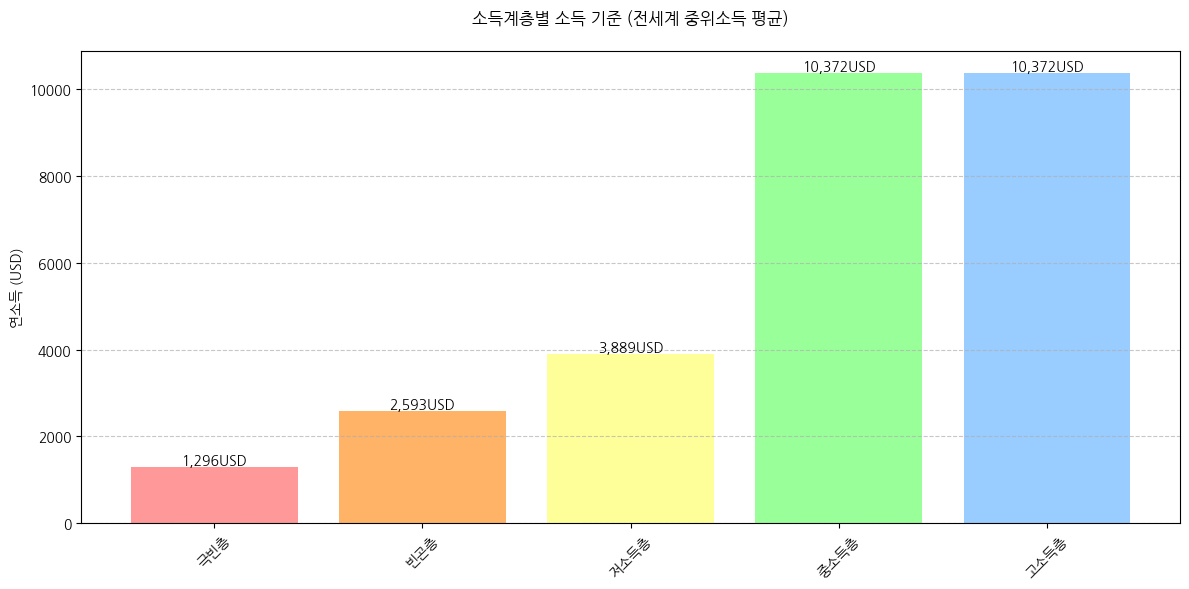

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 중위소득 설정
median_income = orgDf['median_income'].mean()

# 소득 계층별 기준 계산
income_criteria = pd.DataFrame({
    '소득계층': ['극빈층', '빈곤층', '저소득층', '중소득층', '고소득층'],
    '기준(중위소득 대비)': ['25% 미만', '50% 미만', '75% 미만', '75%~200%', '200% 이상'],
    '연소득 범위(USD)': [
        f'0 ~ {int(median_income * 0.25):,}',
        f'{int(median_income * 0.25):,} ~ {int(median_income * 0.5):,}',
        f'{int(median_income * 0.5):,} ~ {int(median_income * 0.75):,}',
        f'{int(median_income * 0.75):,} ~ {int(median_income * 2):,}',
        f'{int(median_income * 2):,} 이상'
    ],
    '실제 금액(USD)': [
        median_income * 0.25,
        median_income * 0.5,
        median_income * 0.75,
        median_income * 2,
        median_income * 2
    ]
})

# 표 출력
print("OECD 기준 소득계층 구분 (중위소득 기준)")
print("="*80)
print(income_criteria[['소득계층', '기준(중위소득 대비)', '연소득 범위(USD)']])

# 시각화
plt.figure(figsize=(12, 6))
colors = ['#FF9999', '#FFB366', '#FFFF99', '#99FF99', '#99CCFF']

# 바 차트 생성
bars = plt.bar(income_criteria['소득계층'], income_criteria['실제 금액(USD)'], color=colors)

# 차트 꾸미기
plt.title('소득계층별 소득 기준 (전세계 중위소득 평균)', pad=20)
plt.ylabel('연소득 (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 바 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}USD',
             ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# median_income = orgDf['median_income'].mean() 

# dimensionLow = orgDf['median_income'] <= 3889 # 저소득국가
# dimensionHigh = orgDf['median_income'] => 10372 # 저소득국가


# 소득 기준으로 국가 분류
dimensionLow = orgDf['median_income'] <= 3889  # 저소득국가
dimensionHigh = orgDf['median_income'] >= 10372  # 고소득국가
dimensionMiddle = (orgDf['median_income'] > 3889) & (orgDf['median_income'] < 10372)  # 중소득국가

# 각 소득 그룹의 국가 수 확인
print("국가 분류 현황")
print("="*50)
print(f"저소득국가 수: {dimensionLow.sum()}")
print(f"중소득국가 수: {dimensionMiddle.sum()}")
print(f"고소득국가 수: {dimensionHigh.sum()}")


국가 분류 현황
저소득국가 수: 67
중소득국가 수: 23
고소득국가 수: 21


In [18]:
# # 각 소득 그룹별 국가 목록
# print("\n저소득국가 목록:")
# print(orgDf[dimensionLow]['country'].tolist())

# print("\n중소득국가 목록:")
# print(orgDf[dimensionMiddle]['country'].tolist())

# print("\n고소득국가 목록:")
# print(orgDf[dimensionHigh]['country'].tolist())

# # 각 그룹의 기초 통계량
# print("\n그룹별 중위소득 통계")
# print("="*50)
# print("\n저소득국가 통계:")
# print(orgDf[dimensionLow]['median_income'].describe())

# print("\n중소득국가 통계:")
# print(orgDf[dimensionMiddle]['median_income'].describe())

# print("\n고소득국가 통계:")
# print(orgDf[dimensionHigh]['median_income'].describe())


In [19]:
# 소득별 국가 데이터프레임 생성
lowIncomedf = orgDf[dimensionLow]
middleIncomedf = orgDf[dimensionMiddle]
highIncomedf = orgDf[dimensionHigh]

# # 결과 확인
# print("저소득국가 데이터 정보")
# print("="*50)
# print(f"저소득국가 수: {len(lowIncomedf)}")
# print("\n기본 정보:")
# print(lowIncomedf.info())

# print("\n기초 통계량:")
# print(lowIncomedf.describe())

# # 특정 컬럼만 보기를 원한다면
# # columns_to_show = ['country', 'median_income', '다른_컬럼명']
# # print(lowIncomedf[columns_to_show])

# # 중위소득 기준 정렬하여 보기
# print("\n중위소득 기준 정렬된 저소득국가 목록:")
# print(lowIncomedf.sort_values(by='median_income', ascending=False))

# lowIncomedf

lowIncomedf[['country' , 'adjusted_satisfaction', 'happyScore']]
middleIncomedf[['country' , 'adjusted_satisfaction', 'happyScore']]
highIncomedf[['country' , 'adjusted_satisfaction', 'happyScore']]

,country,adjusted_satisfaction,happyScore
3,Austria,59.0,7.200
4,Australia,65.0,7.284
7,Belgium,63.0,6.937
16,Canada,69.0,7.427
17,Switzerland,70.0,7.587
25,Germany,61.0,6.750
27,Denmark,74.0,7.527
31,Spain,60.0,6.329
33,Finland,70.0,7.406
34,France,52.0,6.575


/tmp/ipykernel_44184/2897336195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowIncomedf['Income_Group'] = '저소득국가'
/tmp/ipykernel_44184/2897336195.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middleIncomedf['Income_Group'] = '중소득국가'
/tmp/ipykernel_44184/2897336195.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

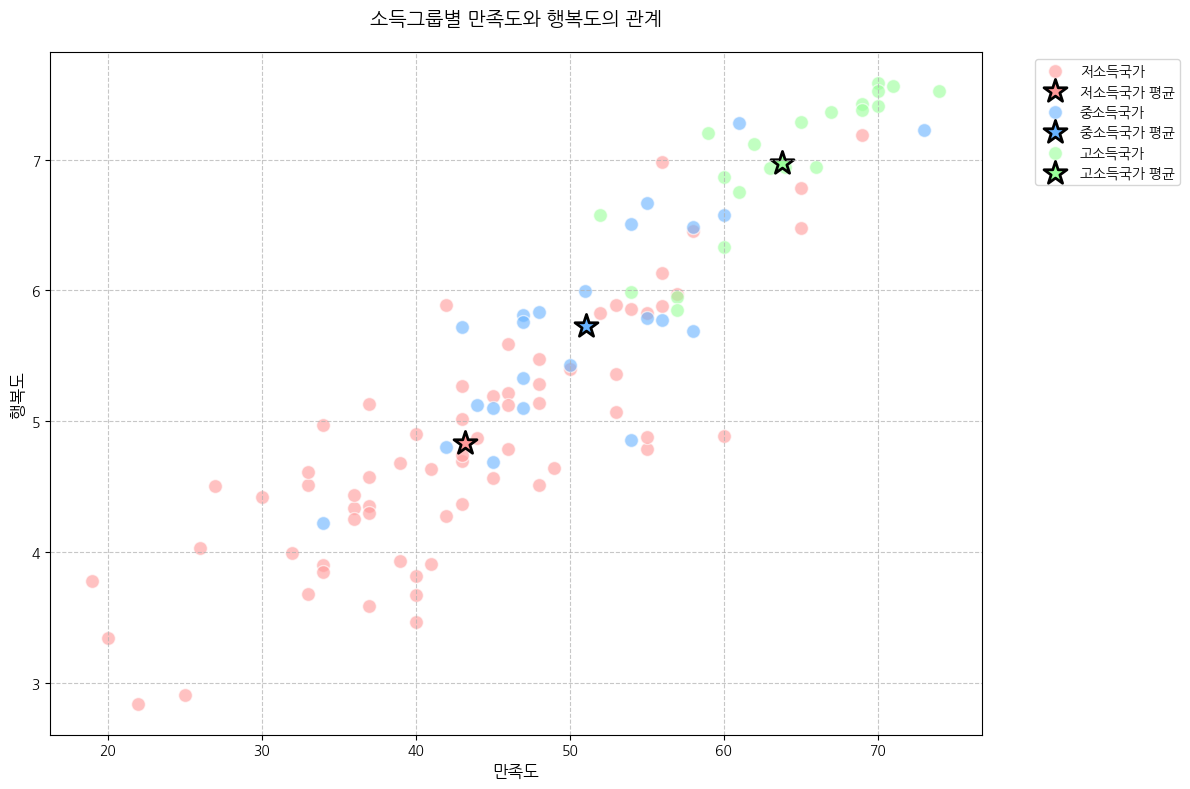


소득그룹별 평균 통계
             adjusted_satisfaction             happyScore              
                              mean   min   max       mean    min    max
Income_Group                                                           
고소득국가                       63.810  52.0  74.0      6.976  5.848  7.587
저소득국가                       43.209  19.0  69.0      4.830  2.839  7.187
중소득국가                       51.043  34.0  73.0      5.728  4.218  7.278

소득그룹별 만족도와 행복도의 상관관계
저소득국가: 0.826
중소득국가: 0.819
고소득국가: 0.849


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 데이터프레임에 소득그룹 컬럼 추가
lowIncomedf['Income_Group'] = '저소득국가'
middleIncomedf['Income_Group'] = '중소득국가'
highIncomedf['Income_Group'] = '고소득국가'

# 데이터프레임 합치기
combined_df = pd.concat([
    lowIncomedf[['country', 'adjusted_satisfaction', 'happyScore', 'Income_Group', 'std_satisfaction']],
    middleIncomedf[['country', 'adjusted_satisfaction', 'happyScore', 'Income_Group', 'std_satisfaction']],
    highIncomedf[['country', 'adjusted_satisfaction', 'happyScore', 'Income_Group', 'std_satisfaction']]
])

# 색상 정의
colors = {'저소득국가': '#FF9999', '중소득국가': '#66B2FF', '고소득국가': '#99FF99'}

# 산점도와 평균값을 함께 표시
plt.figure(figsize=(12, 8))

for group in combined_df['Income_Group'].unique():
    group_data = combined_df[combined_df['Income_Group'] == group]
    
    # 산점도
    plt.scatter(group_data['adjusted_satisfaction'], 
               group_data['happyScore'], 
               c=colors[group],
               s=100,  # 점 크기
               alpha=0.6,
               label=f'{group}',
               edgecolor='white')
    
    # 평균점 표시
    mean_x = group_data['adjusted_satisfaction'].mean()
    mean_y = group_data['happyScore'].mean()
    plt.scatter(mean_x, mean_y, 
               c=colors[group],
               s=300,  # 큰 점으로 평균 표시
               marker='*',  # 별표 모양
               edgecolor='black',
               linewidth=2,
               label=f'{group} 평균')

plt.xlabel('만족도', fontsize=12)
plt.ylabel('행복도', fontsize=12)
plt.title('소득그룹별 만족도와 행복도의 관계', fontsize=14, pad=20)

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)

# 범례 위치 조정
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 여백 조정
plt.tight_layout()

plt.show()

# 통계 정보 출력
print("\n소득그룹별 평균 통계")
print("="*70)
stats = combined_df.groupby('Income_Group').agg({
    'adjusted_satisfaction': ['mean', 'min', 'max'],
    'happyScore': ['mean', 'min', 'max']
}).round(3)
print(stats)

# 상관관계 분석
print("\n소득그룹별 만족도와 행복도의 상관관계")
print("="*70)
for group in combined_df['Income_Group'].unique():
    group_data = combined_df[combined_df['Income_Group'] == group]
    correlation = group_data['adjusted_satisfaction'].corr(group_data['happyScore'])
    print(f"{group}: {correlation:.3f}")


제안 6: 만족도 표준 편차를 통한 사회 안정성 평가
- 문제 정의: 만족도 표준 편차(std_satisfaction)를 활용하여 국가별 사회 안정성을 평가합니다.
- 배경: 표준 편차가 큰 경우 만족도의 불균형이 크다는 것을 의미하며, 이는 사회적 불안정성의 지표로 활용될 수 있습니다.


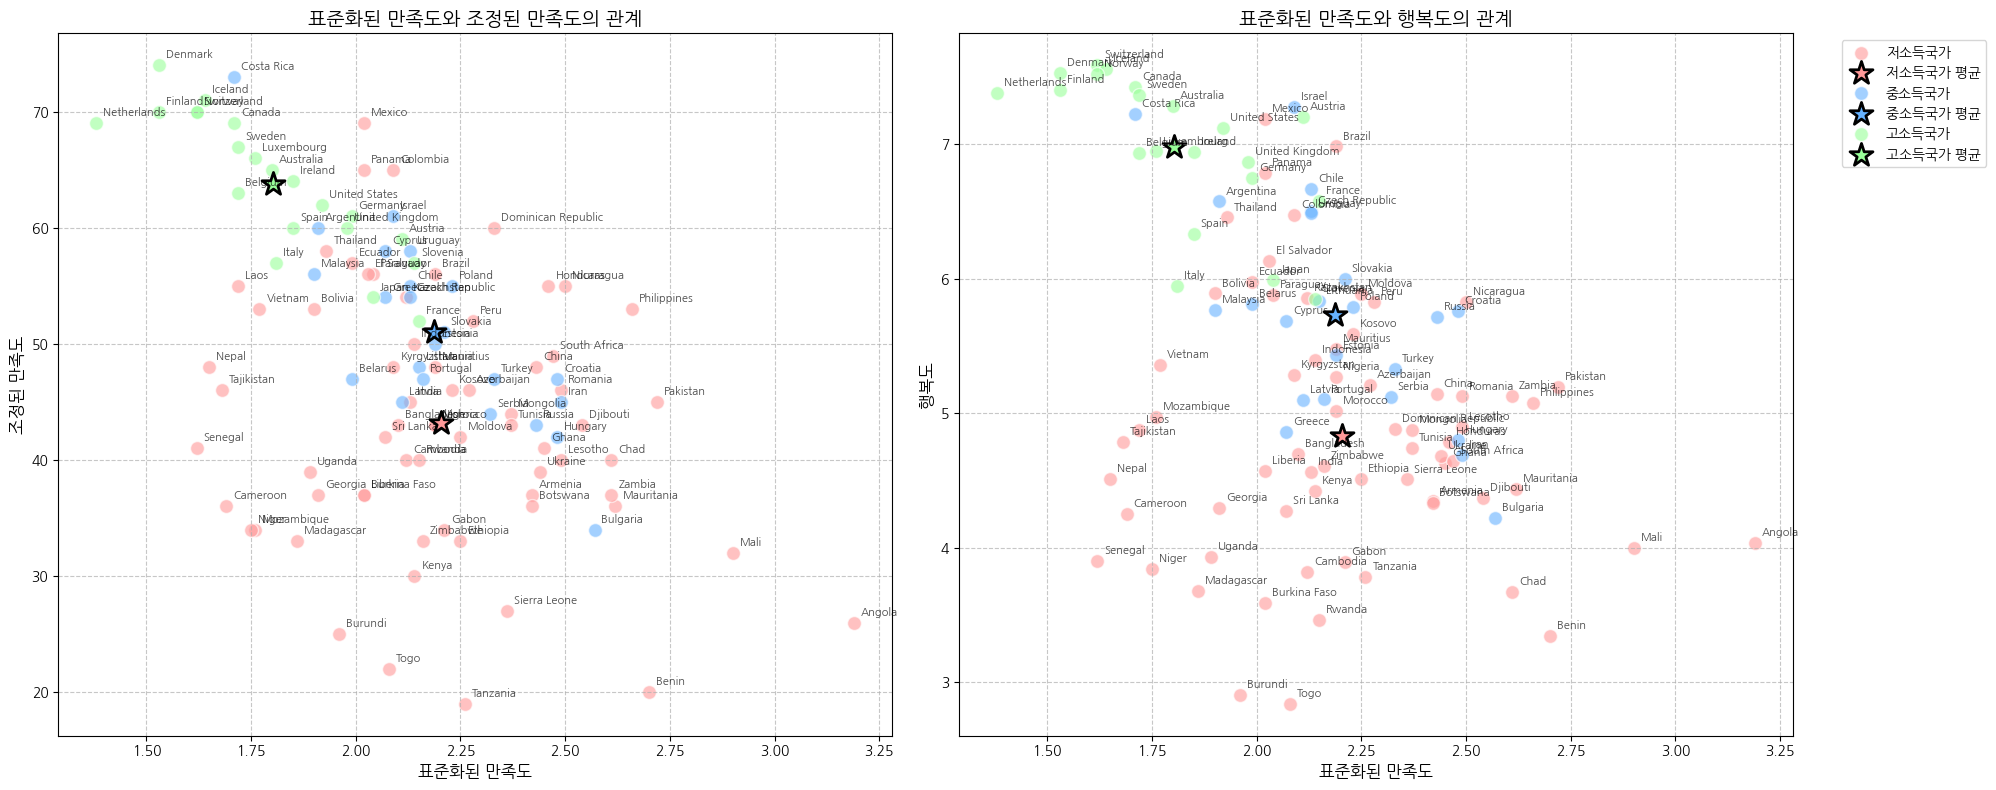


각 소득그룹별 표준화된 만족도와 다른 변수들의 상관관계

저소득국가:
표준화된 만족도 - 조정된 만족도 상관계수: -0.203
표준화된 만족도 - 행복도 상관계수: -0.086

중소득국가:
표준화된 만족도 - 조정된 만족도 상관계수: -0.822
표준화된 만족도 - 행복도 상관계수: -0.644

고소득국가:
표준화된 만족도 - 조정된 만족도 상관계수: -0.877
표준화된 만족도 - 행복도 상관계수: -0.669

소득그룹별 통계 요약
             std_satisfaction             adjusted_satisfaction              \
                         mean   min   max                  mean   min   max   
Income_Group                                                                  
고소득국가                   1.803  1.38  2.15                63.810  52.0  74.0   
저소득국가                   2.204  1.62  3.19                43.209  19.0  69.0   
중소득국가                   2.186  1.71  2.57                51.043  34.0  73.0   

             happyScore                
                   mean    min    max  
Income_Group                           
고소득국가             6.976  5.848  7.587  
저소득국가             4.830  2.839  7.187  
중소득국가             5.728  4.218  7.278  

소득그룹별 국가 목록

저소득국가:
Armenia, Angola

In [21]:
# combined_df['std_satisfaction']
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 합치기 (이전과 동일)
combined_df = pd.concat([
    lowIncomedf[['country', 'adjusted_satisfaction', 'happyScore', 'Income_Group', 'std_satisfaction']],
    middleIncomedf[['country', 'adjusted_satisfaction', 'happyScore', 'Income_Group', 'std_satisfaction']],
    highIncomedf[['country', 'adjusted_satisfaction', 'happyScore', 'Income_Group', 'std_satisfaction']]
])

# 두 개의 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

colors = {'저소득국가': '#FF9999', '중소득국가': '#66B2FF', '고소득국가': '#99FF99'}

# 첫 번째 그래프: std_satisfaction vs adjusted_satisfaction
for group in combined_df['Income_Group'].unique():
    group_data = combined_df[combined_df['Income_Group'] == group]
    
    # 산점도
    ax1.scatter(group_data['std_satisfaction'], 
               group_data['adjusted_satisfaction'], 
               c=colors[group],
               s=100,
               alpha=0.6,
               label=f'{group}',
               edgecolor='white')
    
    # 국가 이름 표시
    for idx, row in group_data.iterrows():
        ax1.annotate(row['country'], 
                    (row['std_satisfaction'], row['adjusted_satisfaction']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.7)
    
    # 평균점 표시
    mean_x = group_data['std_satisfaction'].mean()
    mean_y = group_data['adjusted_satisfaction'].mean()
    ax1.scatter(mean_x, mean_y, 
                c=colors[group],
                s=300,
                marker='*',
                edgecolor='black',
                linewidth=2,
                label=f'{group} 평균')

ax1.set_xlabel('표준화된 만족도', fontsize=12)
ax1.set_ylabel('조정된 만족도', fontsize=12)
ax1.set_title('표준화된 만족도와 조정된 만족도의 관계', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# 두 번째 그래프: std_satisfaction vs happyScore
for group in combined_df['Income_Group'].unique():
    group_data = combined_df[combined_df['Income_Group'] == group]
    
    # 산점도
    ax2.scatter(group_data['std_satisfaction'], 
               group_data['happyScore'], 
               c=colors[group],
               s=100, 
               alpha=0.6,
               label=f'{group}',
               edgecolor='white')
    
    # 국가 이름 표시
    for idx, row in group_data.iterrows():
        ax2.annotate(row['country'], 
                    (row['std_satisfaction'], row['happyScore']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.7)
    
    # 평균점 표시
    mean_x = group_data['std_satisfaction'].mean()
    mean_y = group_data['happyScore'].mean()
    ax2.scatter(mean_x, mean_y, 
                c=colors[group],
                s=300,
                marker='*',
                edgecolor='black',
                linewidth=2,
                label=f'{group} 평균')

ax2.set_xlabel('표준화된 만족도', fontsize=12)
ax2.set_ylabel('행복도', fontsize=12)
ax2.set_title('표준화된 만족도와 행복도의 관계', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.7)

# 범례 조정
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 상관관계 분석
print("\n각 소득그룹별 표준화된 만족도와 다른 변수들의 상관관계")
print("="*70)
for group in combined_df['Income_Group'].unique():
    print(f"\n{group}:")
    group_data = combined_df[combined_df['Income_Group'] == group]
    
    # 표준화된 만족도와 조정된 만족도의 상관관계
    corr_adj = group_data['std_satisfaction'].corr(group_data['adjusted_satisfaction'])
    print(f"표준화된 만족도 - 조정된 만족도 상관계수: {corr_adj:.3f}")
    
    # 표준화된 만족도와 행복도의 상관관계
    corr_happy = group_data['std_satisfaction'].corr(group_data['happyScore'])
    print(f"표준화된 만족도 - 행복도 상관계수: {corr_happy:.3f}")

# 각 그룹별 요약 통계
print("\n소득그룹별 통계 요약")
print("="*70)
summary_stats = combined_df.groupby('Income_Group').agg({
    'std_satisfaction': ['mean', 'min', 'max'],
    'adjusted_satisfaction': ['mean', 'min', 'max'],
    'happyScore': ['mean', 'min', 'max']
}).round(3)
print(summary_stats)

# 각 그룹의 국가 목록 출력
print("\n소득그룹별 국가 목록")
print("="*70)
for group in combined_df['Income_Group'].unique():
    countries = combined_df[combined_df['Income_Group'] == group]['country'].tolist()
    print(f"\n{group}:")
    print(", ".join(countries))


- 만족도와 행복도의 상관관계

모든 소득그룹에서 만족도와 행복도는 강한 양의 상관관계를 보임 (0.81~0.85)
고소득국가가 가장 높은 상관관계(0.849)를 보여, 만족도와 행복도의 연관성이 가장 강함

- 표준화된 만족도의 특이점

표준화된 만족도는 조정된 만족도 및 행복도와 음의 상관관계를 보임
특히 고소득국가(-0.877)와 중소득국가(-0.822)에서 강한 음의 상관관계가 나타남
이는 만족도의 편차가 클수록 실제 만족도와 행복도가 낮아지는 경향을 시사

- 소득그룹별 평균 비교

고소득국가: 만족도 63.81, 행복도 6.976
중소득국가: 만족도 51.04, 행복도 5.728
저소득국가: 만족도 43.21, 행복도 4.830
소득수준과 만족도/행복도는 명확한 양의 관계를 보임

- 케이스 분석

+ 저소득국가 중 주목할 만한 사례: 브라질(Brazil)

저소득국가임에도 불구하고 상대적으로 높은 행복도와 만족도를 보임
경제적 지표와 별개로 문화적, 사회적 요인이 행복도에 긍정적 영향을 미치는 것으로 해석 가능

+ 고소득국가 중 주목할 만한 사례: 프랑스(France)

고소득국가 중 가장 낮은 만족도(52.0)를 보임
행복도(6.575) 역시 고소득국가 평균(6.976)보다 낮음
높은 경제수준에도 불구하고 상대적으로 낮은 만족도와 행복도를 보이는 특이 케이스
이러한 특이 케이스들은 경제적 수준만이 행복도와 만족도를 결정하는 것이 아니라, 문화적, 사회적, 환경적 요인들도 중요한 영향을 미친다는 것을 시사합니다. 특히 프랑스의 사례는 물질적 풍요가 반드시 높은 삶의 만족도로 이어지지 않을 수 있다는 점을 보여줍니다.